In [23]:
# Modules
import random
import numpy
import matplotlib.pyplot
import os

In [24]:
os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_1\Intelligent Systems\HWA\KP instances")

In [25]:
# Generator/Selection of PIs
def instances(n, kp_limit):
    if kp_limit != 0: # If a knapsack limit is defined, instances are generated
        PIs = []
        for element in range(n):
            PIs.append((random.uniform(1.0, 15.0), random.randint(1, kp_limit//3))) # (value (1-15), weight (1 - 1/3kp))
        return PIs, kp_limit
    else: # When the knapsack limit is not defined, then a instance from the library is used
        import os
        os.chdir(r"C:\Users\xedua\OneDrive\Escritorio\MCC-I\Semester_1\Intelligent Systems\HWA\KP instances")
        fileName = f'ks_{n}_0' # Introduces the PIs number into the filename that will be requested
        f = open(fileName, "r")
        lines = f.readlines()
        line = lines[0].split(",")
        nbItems = int(line[0].strip())
        maxWeight = int(line[1].strip())
        items = [None] * nbItems
        for i in range(0, nbItems):
            line = lines[i + 1].split(",")
            weight = int(line[0].strip())
            profit = float(line[1].strip())
            items[i] = (profit, weight) # Shifts order from (weight, profit) to (weight, profit)
        problem = (maxWeight, items) # Problem stores, maxweight and items
        PIs = list() # Creates a new list for the PIs
        for element in problem[1]: # Each  item properties
            PIs.append(element) # Stores/isolates the items properties in a new list
        kp_limit = problem[0] # Stores/isolates the kp limit in a new variable
        return PIs, kp_limit # Returns the items properties and the kp limit 

In [26]:
# Individual initialization
def createIndividual(n):
  return numpy.random.randint(0, 2, n)

In [27]:
# Crossover operator
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = numpy.random.randint(1, len(parentA))
    offspringA = numpy.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = numpy.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = numpy.copy(parentA)
    offspringB = numpy.copy(parentB)
  return offspringA, offspringB

In [28]:
# Mutation operator
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      individual[i] = not(individual[i])
  return individual

In [29]:
# Evaluation function # It was changed
def evaluate(P, individual, kp): # P is my list of items, kp is the max size the knapsack can hold
    s1 = (0, 0) #  I have a tuple instead (value, weight)
    for i in range(len(P)):
        if individual[i] == 1: # Individual of 1, means position i object is in the knapsack
            s1 = (s1[0] + P[i][0], s1[1] + P[i][1]) # Sums up the value and the weight in the s1 tuple
    return s1

In [30]:
# Tournament selection # It was changed
def select(population, evaluation, tSize): 
  winner = numpy.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = numpy.random.randint(0, len(population))
    if (evaluation[rival][0] > evaluation[winner][0]):
      winner = rival
  return population[winner]

In [31]:
# Dooming of individuals
def extinguish(population, evaluation, kp_limit): # Receives population, evaluation and the knapsack weight limit
    index_list = []
    for i in range(len(evaluation)):
        if evaluation[i][1] > kp_limit:
            index_list.append(i)
    for index in sorted(index_list, reverse = True):
        del population[index]
        del evaluation[index]
    return population, evaluation

In [69]:
# Genetic algorithm
from numpy import delete
def geneticAlgorithm(PIs, population_size, generations, cRate, mRate, kp_limit):
  
  # Creates the initial population
  number_objects = len(PIs)
  population = []
  evaluation = []
  noneindexes = []

  for i in range(population_size):
    population.append(createIndividual(number_objects))
    evaluation.append(evaluate(PIs, population[i], kp_limit))
  population, evaluation = extinguish(population, evaluation, kp_limit) # Kills the indivuals that exceed the kp_limit size 
  population_size = len(population)

  # Keeps a record of the best individual found so far
  index = 0;
  for i in range(1, population_size):
    if (evaluation[i][0] > evaluation[index][0]):
      index = i;
  bestIndividual = population[index]
  bestEvaluation = evaluation[index][0]
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * generations
  avg = [0] * generations

  # Runs the evolutionary process
  for i in range(generations):
    if population_size % 2 != 0: # For some reason if the population is odd the code crashes, so I fixed the population size
      population_size = population_size - 1
    newPopulation = []
    # Crossover
    for j in range(population_size // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation.append(offspring1)
      newPopulation.append(offspring2)
    population = newPopulation
    # Mutation
    noneindexes = []
    for j in range(population_size):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(PIs, population[j], kp_limit) # Added kp
    population, evaluation = extinguish(population, evaluation, kp_limit) # Kills the indivuals that exceed the kp_limit size
    population_size = len(population)

    for j in range(population_size):
      # Keeps a record of the best individual found so far
      if (evaluation[j][0] > bestEvaluation):
        bestEvaluation = evaluation[j][0]
        bestIndividual = population[j]
        bestIndWeight = population[j][0]
      best[i] = bestEvaluation
      avg[i] = numpy.average([item[0] for item in evaluation])
  matplotlib.pyplot.plot(range(generations), best, label = "Best")
  matplotlib.pyplot.plot(range(generations), avg, label = "Average")
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Run")
  matplotlib.pyplot.show()
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation,    

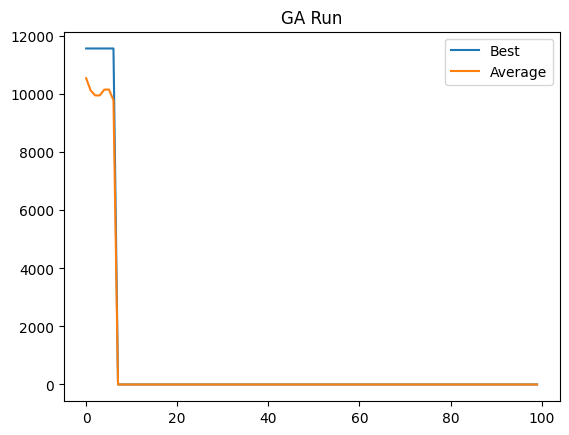

The maximum knapsack size is:
31181
The solution is:
[0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0]
The total profit is:
11574.0


In [70]:
PIs, kp_limit = instances(19, 0)
solution, eval = geneticAlgorithm(PIs, 100 ,100, 1, 0.01, kp_limit)
print('The maximum knapsack size is:')
print(kp_limit)
print('The solution is:')
print(solution)
print('The total profit is:')
print(eval)